In [9]:
import pandas as pd

df = pd.read_csv('housing_data.csv', sep=';', thousands='.')

print(df.head(5))

   CRIM    ZN  INDUS  CHAS   NOX     RM   AGE    DIS  RAD   TAX  PTRATIO  \
0   632  1800   2310     0  5380  65750  6520  40900    1  2960     1530   
1  2731     0   7070     0  4690  64210  7890  49671    2  2420     1780   
2  2729     0   7070     0  4690  71850  6110  49671    2  2420     1780   
3  3237     0   2180     0  4580  69980  4580  60622    3  2220     1870   
4  6905     0   2180     0  4580  71470  5420  60622    3  2220     1870   

       B  LSTAT  MEDV  
0  39690    498  2400  
1  39690    914  2160  
2  39283    403  3470  
3  39463    294  3340  
4  39690    533  3620  


In [10]:
"""El proceso de estandarizar la data implica varias tareas, dentro de la inverstigacion he determinado las mas relevantes
que presento a continuacion para efecto de practica y jugar con los resultados:
    Normalización: Esto es útil cuando las variables tienen diferentes escalas y se desea igualarlas.
    Estandarización: Esto es útil cuando se desea que las variables tengan una distribución más cercana a una distribución normal.
    Codificación de variables categóricas: Esto puede incluir la creación de columnas dummies (variables binarias) para cada categoría o la codificación ordinal si las categorías tienen un orden inherente.
    Eliminación de valores atípicos: Identificar y eliminar valores atípicos que puedan afectar negativamente los resultados del análisis.
    Manejo de valores faltantes: Rellenar o eliminar los valores faltantes en el dataset.
    """
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV con separador ';'
df = pd.read_csv('housing_data.csv', sep=';', thousands='.')


# Estandarizar los datos numéricos
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Crear columnas dummies para la variable categórica 'CHAS'
chas_dummies = pd.get_dummies(df['CHAS'], prefix='CHAS')
df = pd.concat([df, chas_dummies], axis=1)

# Mostrar las primeras cinco filas del DataFrame transformado
print(df.head())

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE    DIS  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  40900   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  49671   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  49671   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  60622   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  60622   

   RAD   TAX  PTRATIO      B  LSTAT  MEDV  CHAS_0  CHAS_1  
0    1  2960     1530  39690    498  2400       1       0  
1    2  2420     1780  39690    914  2160       1       0  
2    2  2420     1780  39283    403  3470       1       0  
3    3  2220     1870  39463    294  3340       1       0  
4    3  2220     1870  39690    533  3620       1       0  


Resumen estadístico de las nuevas columnas:
           CHAS_0      CHAS_1
count  506.000000  506.000000
mean     0.930830    0.069170
std      0.253994    0.253994
min      0.000000    0.000000
25%      1.000000    0.000000
50%      1.000000    0.000000
75%      1.000000    0.000000
max      1.000000    1.000000


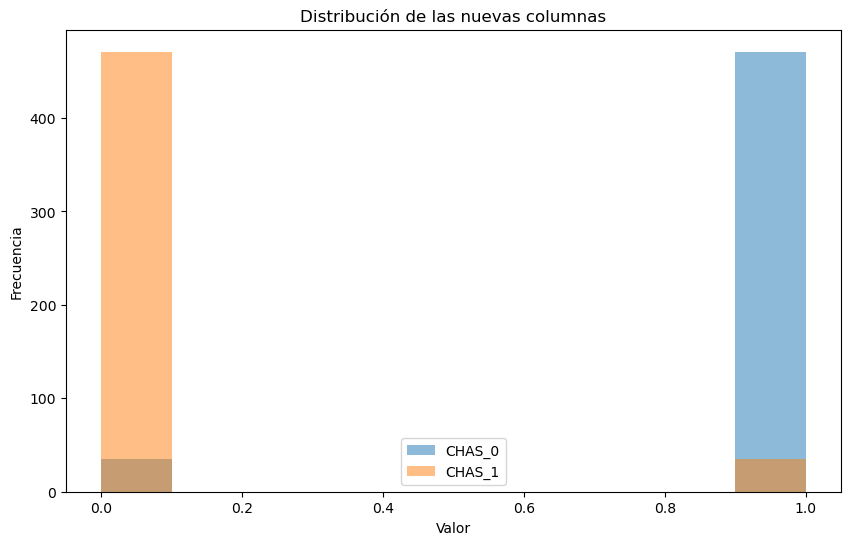

In [12]:
"""En el siguiente ejercicio se busca estandarizar u obtener de las nuevas columnas una informacion facil de leer.
Se trabaja con la columna CHAS que en teoria ficticiamente habla de cercania con un rio, al estandarizarla
o complementarla se puede determinar que cantidad de inmuebles cumplen estas caracteristicas"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV con separador ';'
df = pd.read_csv('housing_data.csv', sep=';', thousands='.')


# Estandarizar los datos numéricos
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Crear columnas dummies para la variable categórica 'CHAS'
chas_dummies = pd.get_dummies(df['CHAS'], prefix='CHAS')
df = pd.concat([df, chas_dummies], axis=1)

# Obtener estadísticas de las nuevas columnas generadas
new_columns = [column for column in df.columns if column.startswith('CHAS_')]
column_stats = df[new_columns].describe()

# Imprimir resumen estadístico de las nuevas columnas
print("Resumen estadístico de las nuevas columnas:")
print(column_stats)

# Graficar las nuevas columnas
plt.figure(figsize=(10, 6))
for column in new_columns:
    plt.hist(df[column], alpha=0.5, label=column)
plt.legend()
plt.title("Distribución de las nuevas columnas")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()